## Оконные функции

**1.Работаем с данными по продажам авокадо!**

Давайте посмотрим на продажи авокадо в двух городах (NewYork, LosAngeles) и узнаем, сколько авокадо типа organic было продано в целом к концу каждой недели (накопительная сумма продаж), начиная с начала периода наблюдений (04/01/15).

Значения внутри окна сортируйте по дате, а саму таблицу отсортируйте по убыванию региона (сначала NY, потом LA) и по возрастанию даты.

**В качестве ответа укажите объем продаж в Нью Йорке на 01/03/15 (без запятых).**

<div class="alert alert-block alert-warning"
<b>
<ol>
<b><li>SELECT</li>
<li>    region,</li>
<li>    date,</li>
<li>    total_volume,</li>
<li>    SUM(total_volume) OVER w AS volume</li>
<li>FROM </li>
<li>    avocado</li>
<li>WHERE </li>
<li>    region IN ('NewYork', 'LosAngeles') AND type='organic'</li>
<li>WINDOW w AS</li>
<li>    (</li>
<li>    PARTITION BY region</li>
<li>    ORDER BY date ASC</li>
<li>    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW</li>
<li>    )</li>
<li>ORDER BY</li>
<li>    region DESC,</li>
<li>    date ASC</li></b>
</ol>
</b>
</div>

**2.** Теперь добавьте разбиение по каждому году (year). Таким образом, в конце февраля 2016 года объем составит уже не продажи за 2015 и январь-февраль 2016, а только январь-февраль 2016.

**Когда объемы продаж органических авокадо в Нью-Йорке превысили объемы продаж в Лос-Анджелесе?**

Для решения задачи постройте график объема продаж в двух городах, где по оси X будет лежать дата.

<div class="alert alert-block alert-warning"
<b>
<ol>
<b><li>SELECT</li>
<li>    region,</li>
<li>    date,</li>
<li>    total_volume,</li>
<li>    SUM(total_volume) OVER w AS volume</li>
<li>FROM</li>
<li>    avocado</li>
<li>WHERE</li>
<li>    region IN ('NewYork', 'LosAngeles') AND type='organic'</li>
<li>    WINDOW w AS</li>
<li>(</li>
<li>    PARTITION BY region, year</li>
<li>    ORDER BY date ASC</li>
<li>    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
<li>    )</li>
<li>ORDER BY</li>
<li>region DESC, date ASC</li></b>
</ol>
</b>
</div>

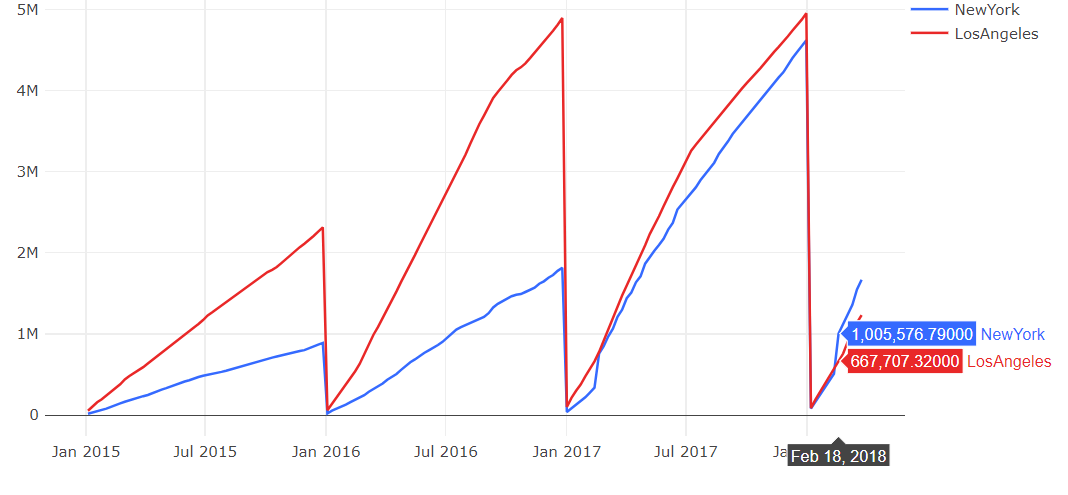

**3.** Посмотрим, когда объемы продаж обычных (**conventional**) авокадо резко падали по сравнению с предыдущей неделей. Возьмите данные по США в целом, посчитайте разницу между объемом продаж в неделю x (**total_volume**) и количеством проданных авокадо в течение предыдущей недели. Значения запишите в новый столбец **week_diff**.

* **type** – тип авокадо (conventional)
* **region** – регион (TotalUS)
* **total_volume** – объем продаж за неделю

**Визуализируйте результат, где по оси x будет расположена дата, а по оси y –разница между продажами в Xt и Xt−1.** 

<div class="alert alert-block alert-warning"
<b>
<ol>
<b><li>SELECT </li>
<li>    date, </li>
<li>    total_volume, </li>
<li>    region, </li>
<li>    total_volume - LAG(total_volume, 1) OVER w AS week_diff</li>
<li>FROM </li>
<li>    avocado </li>
<li>WHERE </li>
<li>    region = 'TotalUS' AND type='conventional'</li>
<li>WINDOW w AS (</li>
<li>    ORDER BY date ASC</li>
<li>    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW</li>
<li>)</li>
<li>ORDER BY  date</li></b>
</ol>
</b>
</div>

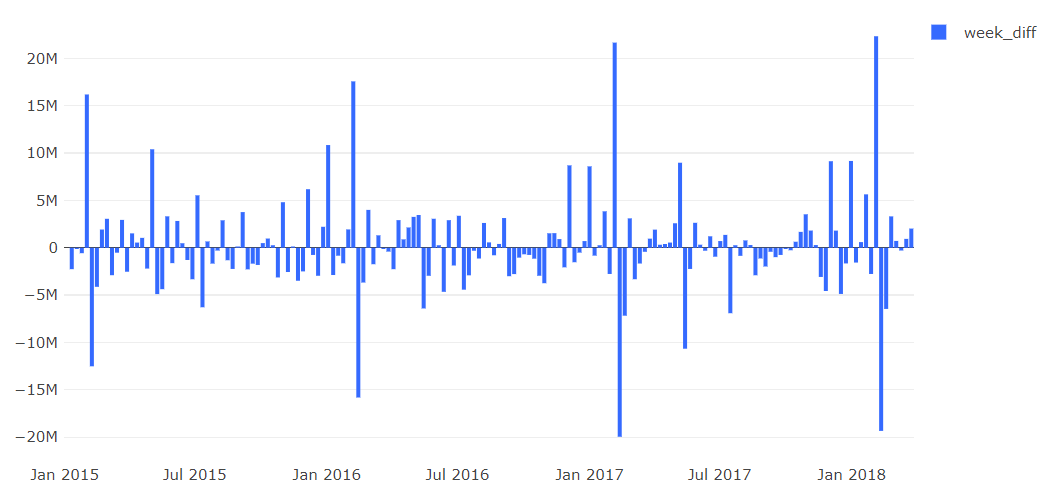

**4.** Посмотрим более подробно на объемы продаж авокадо в Нью-Йорке (NewYork) в 2018 году. Создайте колонку с разницей объемов продаж за неделю и за неделю до этого для каждого типа авокадо. Найдите день, когда продажи авокадо типа organic увеличились по сравнению с предыдущей неделей, а conventional – наоборот упали. Если таких дней несколько, то укажите их через запятую с пробелом, формат – 31/12/2020. 

<div class="alert alert-block alert-warning"
<b>
<ol>
<b><li>SELECT </li>
<li>    type,</li>
<li>    date, </li>
<li>    total_volume - LAG(total_volume, 1) OVER w AS week_diff</li>
<li>FROM </li>
<li>    avocado </li>
<li>WHERE </li>
<li>    region = 'NewYork' AND year = 2018</li>
<li>WINDOW w AS (</li>
<li>    PARTITION BY type</li>
<li>    ORDER BY date ASC</li>
<li>    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW</li>
<li>)</li>
<li>ORDER BY </li> 
<li>    type,</li>
<li>    date</li></b>
</ol>
</b>
</div>

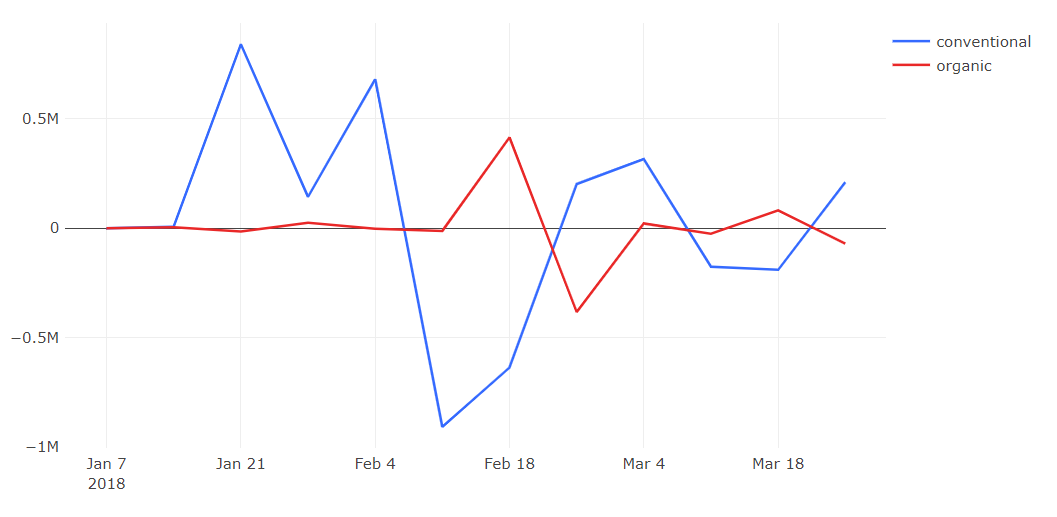

**5.** Теперь посчитайте скользящее среднее цены авокадо (**average_price**) в Нью-Йорке с разбивкой по типу авокадо. В качестве окна используйте текущую неделю и предыдущие две (обратите внимание, что в данной таблице в строках содержатся данные за неделю, а не за один день). Например 04/01/15, 11/01/15 и 18/01/15 для подсчета значения для 18/01/15.

В качестве ответа укажите полученное значение для обычных (**conventional**) авокадо за 17/04/16.

<div class="alert alert-block alert-warning"
<b>
<ol>
<b><li>SELECT </li>
<li>    type,</li>
<li>    date, </li>
<li>    average_price,</li>
<li>    avg(average_price) OVER w AS rolling_price</li>
<li>FROM </li>
<li>    avocado </li>
<li>WHERE </li>
<li>    region = 'NewYork'</li>
<li>WINDOW w AS (</li>
<li>    PARTITION BY type</li>
<li>    ORDER BY date ASC</li>
<li>    ROWS BETWEEN 2 PRECEDING AND CURRENT ROW</li>
<li>)</li>
<li>ORDER BY </li> 
<li>    type,</li>
<li>    date</li></b>
</ol>
</b>
</div>

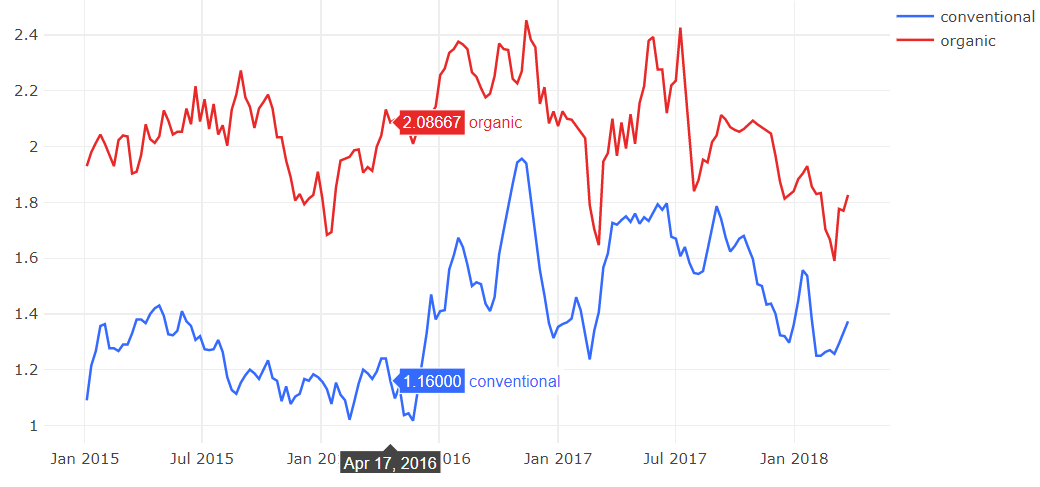